#Built the connection between google drive and Notebook

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


#Enabling the Data table formatter

In [2]:
from google.colab import data_table
data_table.enable_dataframe_formatter

<function google.colab.data_table.enable_dataframe_formatter>

#Importing Required Libraries 

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#CSV Data Exploaration 

In [23]:
house_data=pd.read_csv('/content/gdrive/MyDrive/machine learning /Turicreate/Week 2/home_data.csv')

In [24]:
house_data.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [25]:
#To calculate the number of column contained in this data table
len(house_data.columns)

21

#Importing Sklearn Library to split the data 

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
x= house_data[['sqft_living']]
y= house_data['price']

x_train_data,x_test_data, y_train_data, y_test_data = train_test_split(x,y,test_size=0.25)

#Built the Linear Regrassion model based upon the single feature 

In [28]:
from sklearn.linear_model import LinearRegression

In [29]:
regr= LinearRegression()
sqft_model= regr.fit(x_train_data,y_train_data)

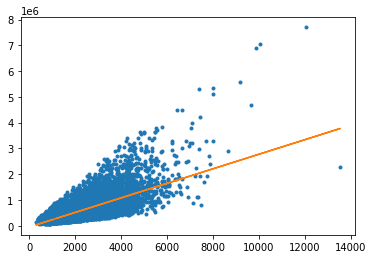

In [30]:
plt.plot(x,y,'.',x,sqft_model.predict(x),'-')

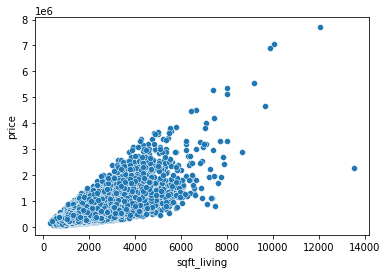

In [36]:
sns.scatterplot(x='sqft_living',y='price',data=house_data)

#Evalution of Single feature Linear Regression (S.F.L.R.) model via test data

In [37]:
sqft_model.score(x_test_data,y_test_data)

0.48303270341349347

#Prediction of house price based upon the S.F.L.R. model

In [38]:
house_1=house_data[house_data['id']==7129300520]

In [39]:
house_1.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.0,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650


In [40]:
house_1[['sqft_living']].iloc[0]

sqft_living    1180
Name: 0, dtype: int64

In [41]:
sqft_model.predict([house_1[['sqft_living']].iloc[0]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([285574.26763054])

#Build the LR model based upon multi features 

In [42]:
x= house_data[['bedrooms','bathrooms','sqft_living','sqft_lot','grade','sqft_basement','yr_built','lat',
             'zipcode','sqft_above','sqft_living15','sqft_lot15']]
y= house_data['price']
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.25)


In [43]:
multi_features_model= regr.fit(x_train,y_train)

#Evaluating the multi feature LR (M.F.L.R) model via test data

In [44]:
multi_features_model.score(x_test,y_test)

0.6471978802484747

#Prediction of house price based upon M.F.L.R. model

In [45]:
multi_features_model.predict(house_1[['bedrooms','bathrooms','sqft_living','sqft_lot','grade','sqft_basement','yr_built','lat',
             'zipcode','sqft_above','sqft_living15','sqft_lot15']])

array([252382.25572152])